___
# Atividade: Análise Exploratória - Variáveis Quantitativas
___

## Aula 03


<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)
    

- [Análise Exploratória - Medidas resumo](#medidasresumo)
    - [Uso de tabelas de frequências para variáveis quantitativas](#tab-freq-quanti)
        - [Exercício 1](#ex1)
    - [Criando objetos que contenham `RENDA` separada por `PLANO`](#rendaporplano)
        - [Exercício 2](#ex2)
    - [Medidas resumo](#medidasresumo)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
        - [Exercício 9](#ex9)


- [Análise Exploratória - Boxplot](#boxplot)
    - [Exercício 10](#ex10)
        

In [1]:
%matplotlib inline
import math
import pandas as pd
import os
import matplotlib.pyplot as plt


# Para ter melhor print
from IPython.display import display

In [2]:
# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lucas\OneDrive\Área de Trabalho\cdados\CD22-2\aula03


___
<div id="empresa-de-tv"></div>

# Empresa de TV

<img src="empresaTV.jpg" height="400">

Fonte: extraído da internet

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(Muito insatisfeito, Insatisfeito, Indiferente, Satisfeito e Muito satisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV_Cod.xlsx` contém as variáveis descritas acima.

In [3]:
# Carregando os dados do arquivo
dados = pd.read_excel('EmpresaTV_Cod.xlsx')

In [4]:
dados['PLANO'] = dados['PLANO'].astype('category')
dados['EC'] = dados['EC'].astype('category')
dados['SATISFACAO'] = dados['SATISFACAO'].astype('category')

dados['PLANO'].cat.categories = ['A', 'B']
dados['EC'].cat.categories = ['Casado', 'Solteiro', 'Outros']
dados['SATISFACAO'] = pd.Categorical(dados.SATISFACAO, 
                                     categories = ['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 
                                                   'Satisfeito', 'Muito Satisfeito'], 
                                     ordered=True)

# Visualizando as cinco primeiras linhas
dados.head(5)

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6


[Volta ao Índice](#indice)

___
<div id="medidasresumo"></div>

# Análise Exploratória - Medidas resumo

Na aula passada, aprendemos algumas ferramentas estatísticas que permitem explorar o comportamento de variáveis qualitativas.

Hoje, nosso objetivo será analisar, numérico e graficamente, as informações descritas em variáveis quantativas.

<div id="tab-freq-quanti"></div>

## Uso de tabelas de frequências para variáveis quantitativas

Vamos ver o que acontece ao tentarmos montar uma tabela de frequências com a variável `RENDA`.

<div id="ex1"></div>

### EXERCÍCIO 1

Faça uma tabela de frequências para a variável `RENDA` usando comando adequado visto na aula anterior.

O *output* fornecido permite explorar o comportamento da renda dos clientes que fizeram adesão de algum plano de TV?

In [5]:
# ESCREVA SEU CODIGO AQUI

In [6]:
dados['RENDA'].value_counts().to_frame()

,RENDA
5.3,3
4.9,3
4.7,2
13.2,2
2.5,2
...,...
11.5,1
10.8,1
8.9,1
0.7,1


[Volta ao Índice](#indice)

<div id="rendaporplano"></div>


## Criando objetos que contenham `RENDA` separada por `PLANO`

Ainda não consideramos a variável RENDA em nossa análise. 
Vamos explora-la para melhor compreender o perfil dos clientes dessa empresa.

Como o objetivo da empresa é entender o perfil dos clientes em cada plano, então vamos antes criar dois novos *dataframes* e duas novas *Series* conforme exercício a seguir. 

<div id="ex2"></div>

### EXERCÍCIO 2

Crie quatro objetos:

- `dados_a` contendo somente os dados dos clientes do plano A;
- `dados_b` contendo somente os dados dos clientes do plano B;
- `renda_a` contendo somente a renda dos clientes do plano A;
- `renda_b` contendo somente a renda dos clientes do plano B.

**Dica:** Use conhecimentos adquiridos nas aulas anteriores.

In [7]:
# ESCREVA SEU CODIGO AQUI

In [8]:
dados_a = dados.loc[dados['PLANO']=='A',:]
dados_b = dados.loc[dados['PLANO']=='B',:]
renda_a = dados.loc[dados['PLANO']=='A',['RENDA']]
renda_b = dados.loc[dados['PLANO']=='B',['RENDA']]
dados_a

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6
5,6,A,Outros,Satisfeito,9.8
6,7,A,Casado,Muito Satisfeito,13.5
7,8,A,Solteiro,Satisfeito,7.8
8,9,A,Casado,Satisfeito,14.4
9,10,A,Casado,Muito Satisfeito,11.2


[Volta ao Índice](#indice)

<div id="medidasresumo"></div>

## Medidas resumo

O pandas disponibiliza diversas funções para o cálculo de medidas resumo. Alguns exemplos são: `mean`, `median`, `quantile`, `var`, `std`. Os nomes das funções dão uma boa dica do que elas fazem, mas, como sempre, é bom verificar a documentação do pandas para garantir que elas fazem o que você espera.


<div id="ex3"></div>

### EXERCÍCIO 3

Imprima a média, o primeiro quartil ($Q1$), segundo quartil ou mediana ($Q2$), terceiro quartil ($Q3$) e o desvio padrão das rendas do clientes do plano A e B, separadamente. 

Interprete os resultados numéricos em termos do problema.

In [9]:
# ESCREVA SEU CODIGO AQUI

In [10]:
dados_a = dados_a.sort_values(by='RENDA')
dados_b = dados_b.sort_values(by='RENDA')

ME_a = dados_a.RENDA.mean()
Q1_a = dados_a.RENDA.quantile(0.25)
Q2_a = dados_a.RENDA.quantile(0.5)
Q3_a = dados_a.RENDA.quantile(0.75)
DP_a = dados_a.RENDA.std()

ME_b = dados_b.RENDA.mean()
Q1_b = dados_b.RENDA.quantile(0.25)
Q2_b = dados_b.RENDA.quantile(0.5)
Q3_b = dados_b.RENDA.quantile(0.75)
DP_b = dados_b.RENDA.std()

print(f' Me_a:   {ME_a}\n Q1_a:   {Q1_a} \n Q2_a:   {Q2_a} \n Q3_a:   {Q3_a} \n DP_a:   {DP_a}')
print('')
print(f' Me_b:   {ME_b}\n Q1_b:   {Q1_b} \n Q2_b:   {Q2_b} \n Q3_b:   {Q3_b} \n DP_b:   {DP_b}')

 Me_a:   10.421739130434782
 Q1_a:   7.4750000000000005 
 Q2_a:   10.350000000000001 
 Q3_a:   13.2 
 DP_a:   4.465567677909533

 Me_b:   5.688888888888887
 Q1_b:   4.15 
 Q2_b:   5.15 
 Q3_b:   6.375 
 DP_b:   3.2934374381078135


[Volta ao Índice](#indice)

<div id="ex4"></div>

### EXERCÍCIO 4

<div id="describe"></div>

Uma função bastante útil em uma análise exploratória de variável quantitativa é a `.describe()`. 

Utilize essa função `.describe()` com as rendas dos planos A e B e compare os resultados numéricos com os obtidos na célula anterior.

In [11]:
# ESCREVA SEU CODIGO AQUI
renda_a.describe()

,RENDA
count,46.000000
mean,10.421739
std,4.465568
min,0.700000
25%,7.475000
50%,10.350000
75%,13.200000
max,21.400000


In [12]:
renda_b.describe()

,RENDA
count,36.000000
mean,5.688889
std,3.293437
min,0.600000
25%,4.150000
50%,5.150000
75%,6.375000
max,19.200000


[Volta ao Índice](#indice)

<div id="ex5"></div>

### EXERCÍCIO 5

Quais hipóteses você pode formular a partir das medidas resumo da renda dos clientes dos dois planos?

In [13]:
#ESCREVA SUA RESPOSTA AQUI

[Volta ao Índice](#indice)

<div id="ex6"></div>

### EXERCÍCIO 6

Estude a função `.groupby(by= )` e utilize-a para imprimir as medidas resumo da variável quantitativa `RENDA` para cada categoria da variável `PLANO`, separadamente.


**DICAS**: Você deve usar essa função no *dataframe* completo `dados` e pode pedir as medidas resumo a partir da função `.describe()`.

In [14]:
#ESCREVA SUA RESPOSTA AQUI

In [15]:
dados.loc[:,['RENDA','PLANO']].groupby(by='PLANO',axis=0).describe()

RENDA                                                      
      count       mean       std  min    25%    50%     75%   max
PLANO                                                            
A      46.0  10.421739  4.465568  0.7  7.475  10.35  13.200  21.4
B      36.0   5.688889  3.293437  0.6  4.150   5.15   6.375  19.2

[Volta ao Índice](#indice)

<div id="ex7"></div>

### EXERCÍCIO 7 
No [Exercício 1](#exe1), vimos que não faz sentido construir uma tabela de frequências na variável `RENDA` devido ao seu tipo de variável ser contínua. 

Crie uma nova coluna em `dados` chamada `FAIXA_DE_RENDA`que contenha a classificação da renda de cada cliente. Para tanto, use 3 faixas de renda, todas com amplitudes iguais. Note que essa quantidade de faixas não necessariamente é uma boa ideia, mas vamos começar com essa análise simplificada.


**DICA**: a função `pd.cut` pode ser útil para resolver este exercício.

In [16]:
#ESCREVA SUA RESPOSTA AQUI
dados

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6
...,...,...,...,...,...
77,78,B,Outros,Insatisfeito,4.3
78,79,B,Solteiro,Insatisfeito,5.7
79,80,B,Casado,Insatisfeito,4.0
80,81,B,Outros,Insatisfeito,5.4


In [36]:
faixas = pd.cut(dados['RENDA'],3, labels= ['baixa','media','alta'])
dados["FAIXA_DE_RENDA"] = faixas

In [37]:
dados

,CLIENTE,PLANO,EC,SATISFACAO,RENDA,FAIXA_DE_RENDA
0,1,A,Casado,Muito Satisfeito,21.4,alta
1,2,A,Solteiro,Muito Satisfeito,17.2,alta
2,3,A,Outros,Muito Satisfeito,15.6,alta
3,4,A,Casado,Satisfeito,10.4,media
4,5,A,Solteiro,Muito Satisfeito,17.6,alta
...,...,...,...,...,...,...
77,78,B,Outros,Insatisfeito,4.3,baixa
78,79,B,Solteiro,Insatisfeito,5.7,baixa
79,80,B,Casado,Insatisfeito,4.0,baixa
80,81,B,Outros,Insatisfeito,5.4,baixa


<div id="ex8"></div>

### EXERCÍCIO 8

Monte uma tabela cruzada de sentimento versus plano e faixa de renda.

In [38]:
#ESCREVA SUA RESPOSTA AQUI

In [39]:
pd.crosstab(dados['SATISFACAO'],[dados['PLANO'],dados['FAIXA_DE_RENDA']])

PLANO                  A                B           
FAIXA_DE_RENDA     baixa media alta baixa media alta
SATISFACAO                                          
Muito Insatisfeito     2     0    0     6     0    0
Insatisfeito           5     0    0    11     0    0
Indiferente            4     3    0    11     1    0
Satisfeito             1    17    2     0     6    1
Muito Satisfeito       0     7    5     0     0    0

<div id="ex9"></div>

### EXERCÍCIO 9

Por que não faria sentido montar uma tabela cruzada utilizando a variável RENDA no lugar de FAIXA_DE_RENDA?

In [42]:
# Pois os valores são quantitativos, ou seja, há inúmeros valores diferentes para uma mesma faixa de renda ou condição financeira
pd.crosstab(dados['SATISFACAO'],[dados['PLANO'],dados['RENDA']])

PLANO                 A                                               ...  \
RENDA              0.7  0.8  1.9  4.7  5.3  6.0  6.1  6.8  7.0  7.4   ...   
SATISFACAO                                                            ...   
Muito Insatisfeito    1    0    1    0    0    0    0    0    0    0  ...   
Insatisfeito          0    1    0    1    1    2    0    0    0    0  ...   
Indiferente           0    0    0    0    0    0    1    1    1    1  ...   
Satisfeito            0    0    0    0    0    0    0    0    0    1  ...   
Muito Satisfeito      0    0    0    0    0    0    0    0    0    0  ...   

PLANO                 B                                               
RENDA              6.2  6.9  7.9  8.1  8.2  9.0  9.5  10.2 10.6 19.2  
SATISFACAO                                                            
Muito Insatisfeito    0    0    0    0    0    0    0    0    0    0  
Insatisfeito          0    0    0    0    0    0    0    0    0    0  
Indiferente           1    1    0    1    0    0    0    0    0    0  
Satisfeito            0    0    1    0    1    1    1    1    1    1  
Muito Satisfeito      0    0    0    0    0    0    0    0    0    0  

[5 rows x 68 columns]

[Volta ao Índice](#indice)

<div id="boxplot"></div>

# Análise Exploratória - Boxplot

O boxplot usa os quartis, os quais segmentam os dados em quatro partes iguais em termos de concentração, ou seja, deixa 25% do tamanho da amostra entre os quartis.

Esse gráfico é uma ferramenta estatística muito importante para extrair informações de **variáveis quantitativas**, além de permitir, com facilidade, cruzar variável quantitativa segmentada por rótulos (níveis) de outra variável qualitativa. 

Outra vantagem desse gráfico é que o mesmo permite identificar possíveis valores aberrantes caso haja observação com valor fora dos limites inferior ($LI$) e superior ($LS$), os quais são calculados a partir dos quartis $Q1$ e $Q3$ da seguinte forma:

 * $LI = Q1 - 1,5 * (Q3 - Q1)$
 * $LS = Q3 + 1,5 * (Q3 - Q1)$

<br>

**Valores que são considerados na construção do boxplot:**

  * A **caixa do boxplot** é formada pelos quartis $Q1$ e $Q3$ e dentro é colocada uma linha de acordo com o valor obtido para a mediana ($Q2$).
  * A **haste inferior** representa o menor valor numérico contido no conjunto de dados desde que esse seja maior que o limite inferior ($LI$). Caso haja valores no conjunto de dados menores do que o $LI$, esses devem ser identificados como *outliers* no gráfico.
  * A **haste superior** representa o maior valor numérico contido no conjunto de dados desde que esse seja menor que o limite superior ($LS$). Caso haja valores no conjunto de dados maiores do que o $LS$, esses devem ser identificados como *outliers* no gráfico.


Para consultar uso de cores na edição de um boxplot, consulte [link1](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) e [link2](https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color), por exemplo.

<br>

A seguir, apresentamos o comando para gerar o boxplot a partir do *matplotlib*. Aproveite para entender o uso do comando `plt.subplot(linhas,colunas,posição)` útil para visualização da análise exploratória dos dados

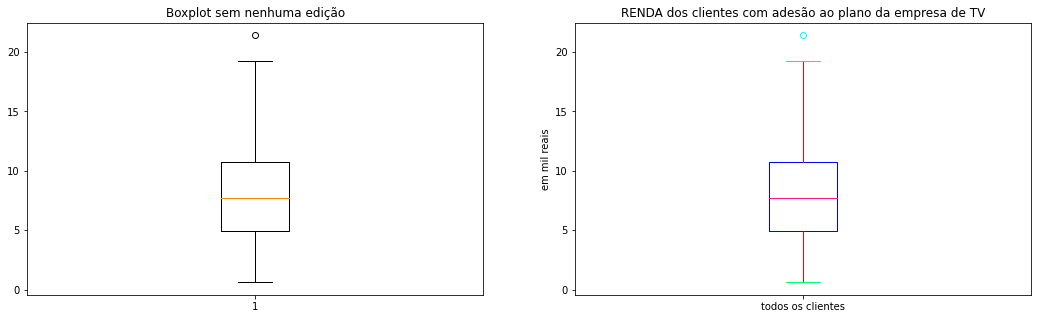

In [43]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.boxplot(dados.RENDA)
plt.title('Boxplot sem nenhuma edição')

plt.subplot(1,2,2)
plt.boxplot(dados.RENDA, labels = ['todos os clientes'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('RENDA dos clientes com adesão ao plano da empresa de TV')
plt.ylabel('em mil reais')

plt.show()

[Volta ao Índice](#indice)

<div id="ex10"></div>

### EXERCÍCIO 10

Estude o comportamento da variável quantitativa `RENDA` segmentado por `PLANO` utilizando a ferramenta gráfica Boxplot.

Faça de duas formas diferentes:
  1. Construção dos boxplots da renda para cada plano em gráficos separados. Aqui, podem usar o comando `plt.subplot()` para organizar o *output*.
  1. Construção de um único gráfico (apenas um eixo y) contendo os dois boxplots da renda para cada plano.
  1. Discuta prols e contras de cada caso.

In [ ]:
#ESCREVA SEU CODIGO AQUI

[Volta ao Índice](#indice)